In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

2023-01-04 00:16:24.864785: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-04 00:16:25.212386: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-04 00:16:25.212405: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-04 00:16:25.278610: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-04 00:16:26.651720: W tensorflow/stream_executor/platform/de

In [2]:
#Fashion mnist dataset is imported using keras 
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [3]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

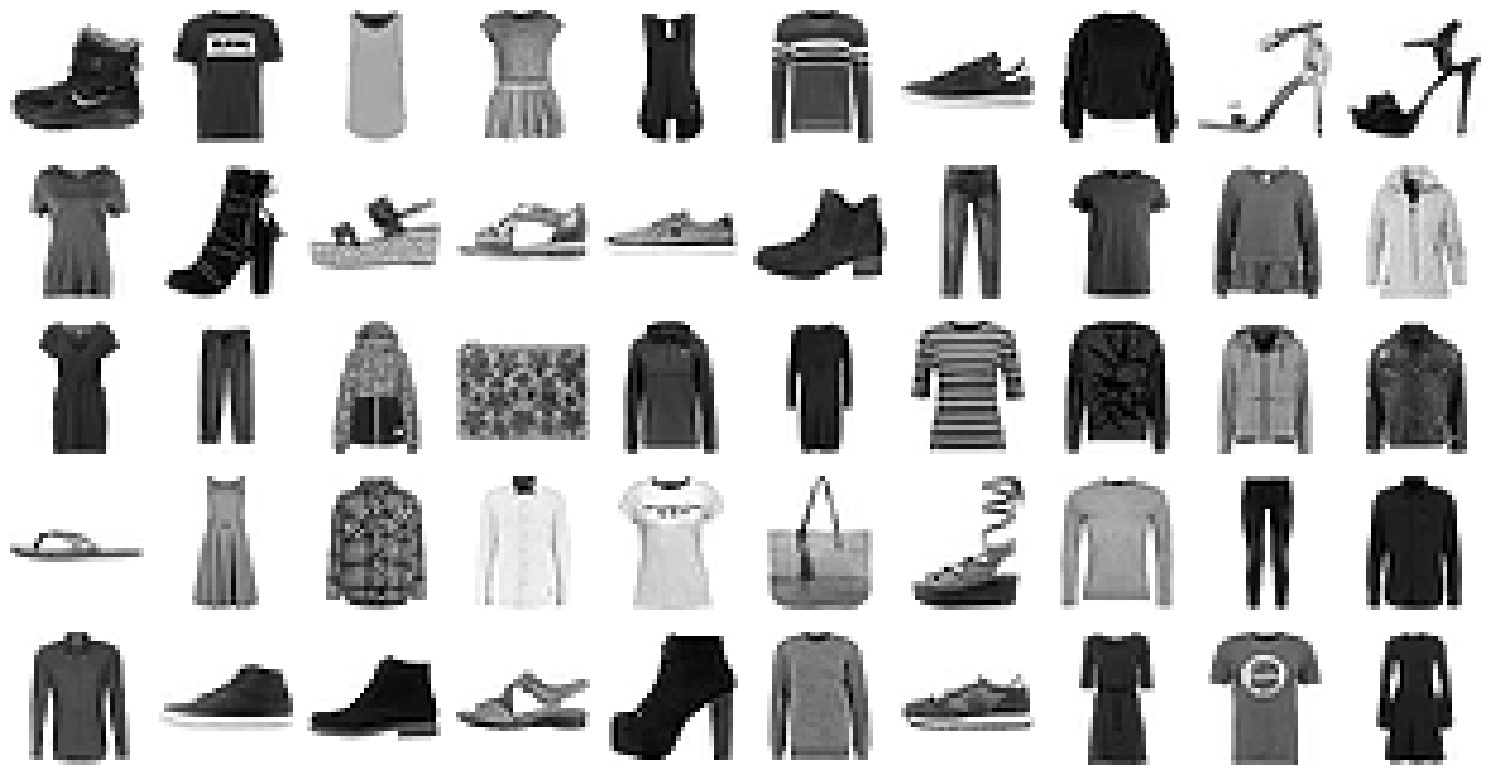

In [4]:
#Lets take a look at sample images
plt.figure(figsize=(15,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(X_train_full[i].reshape((28,28)),cmap='binary')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [5]:
#Assigning some images for the validation set
#We divide each value by 255 as color of any image 
#is in the range (0-255)
# Hence all the features are scaled to the range (0-1)
X_valid,X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid,y_train = y_train_full[:5000] , y_train_full[5000:]

In [6]:
#Almost all the target classes are equally distributed
np.array(np.unique(y_train, return_counts=True)).T
#Total 10 classes with almost equal values

array([[   0, 5543],
       [   1, 5444],
       [   2, 5496],
       [   3, 5499],
       [   4, 5512],
       [   5, 5507],
       [   6, 5507],
       [   7, 5488],
       [   8, 5510],
       [   9, 5494]])

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
#We assign the classes to the target variables
#and they are given below
class_names = ["T-shirt/top" , "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

#Lets verify if our class mapping is correct
class_names[y_train_full[6]]

'Sneaker'

A quick explanation of the model we have built below
- Line1 creates a sequential model in which we have single stack of layers connected sequentially
- Line2 Image input is in form of a 28x28x1 vector (1 as it is a black and white image , if these were colored images we would have used 28x28x3) , so we faltten the input with all values stacked in a single column containing 28x28x1=784 rows
- Line3 is our first Dense hidden layer using of 300 neurons with activation function relu , each hidden layer manages weights and bias vectors connected between neurons and inputs
- Line4 is another Dense hidden layer similar to Line3 but has 100 neurons
- Line5 Is the final Dense output layer with 10 neurons , 10 beacuse we have 10 target classes , using softmax activation function(because the classes are exclusive)


PS: Dense layer means all the neurons of this layer are connected to every neuron of its precceding layer

In [11]:
#Lets build a model with 2 Hidden Layers
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

2022-12-18 00:00:01.451683: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-12-18 00:00:01.452169: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-18 00:00:01.452428: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-18 00:00:01.452968: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-18 00:00:01.453103: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Compiling the model
- Once model is ready we have to call the compile() method to specify the loss function and the optimizer we intend to use
- Loss function we have used here is "sparse_categorical_crossentropy" as the output class is a integer value from (0-9) , if the output class was a one-hot vector to represent value 2 as [00100000000] then we would have used "categorical_cross_entropy" in that case
- Optimizer we have used "sgd" ,simple Stochastic Gradiend Descent
- Since this is a classifier hence useful to measure the "accuracy" as metric

In [13]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

2022-12-18 00:03:19.744193: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


Epoch 1/30
1714/1719 [============================>.] - ETA: 0s - loss: 0.7107 - accuracy: 0.7669

2022-12-18 00:03:45.009590: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15680000 exceeds 10% of free system memory.


1719/1719 [==============================] - 20s 11ms/step - loss: 0.7102 - accuracy: 0.7671 - val_loss: 0.5030 - val_accuracy: 0.8298
Epoch 2/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.4857 - accuracy: 0.8316 - val_loss: 0.4503 - val_accuracy: 0.8436
Epoch 3/30
1719/1719 [==============================] - 21s 12ms/step - loss: 0.4428 - accuracy: 0.8435 - val_loss: 0.4197 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 36s 21ms/step - loss: 0.4160 - accuracy: 0.8543 - val_loss: 0.4002 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 30s 17ms/step - loss: 0.3973 - accuracy: 0.8608 - val_loss: 0.3895 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 33s 19ms/step - loss: 0.3806 - accuracy: 0.8654 - val_loss: 0.3716 - val_accuracy: 0.8752
Epoch 7/30
1719/1719 [==============================] - 31s 18ms/step - loss: 0.3676 - accuracy: 0.8706 - val_loss: 0.3610 - val_accurac

Learning Curve

we can see that the training accuracy and validation accuracy both increase steadily
- Training loss and validation loss decrease which is good
- Since validation curves are close to training curves hence we could say our model is good and there is no overfitting

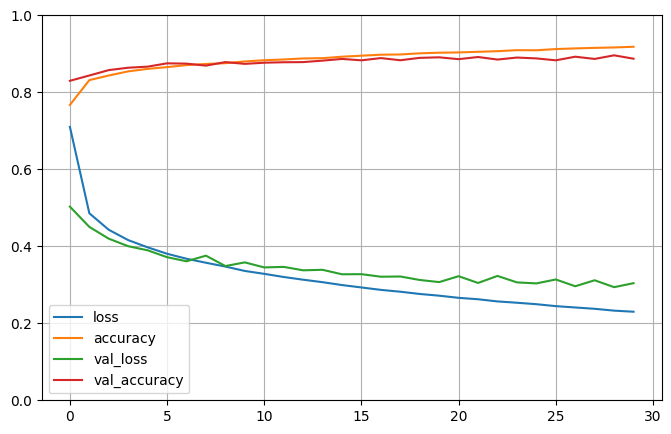

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 51.4683 - accuracy: 0.8682


[51.46830368041992, 0.8682000041007996]

In [16]:
# we test our model on just 3 images from the test set
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 1s 643ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1])

In [18]:
#Predictions made by our model on 1st 3 images of test set
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

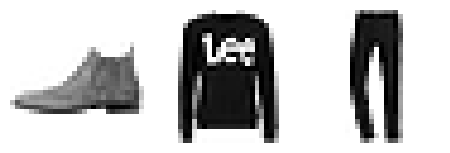

In [19]:
plt.figure(figsize=(15,8))
for i in range(3):
    plt.subplot(5,10,i+1)
    plt.imshow(X_new[i].reshape((28,28)),cmap='binary')
    plt.axis("off")
plt.tight_layout()
plt.show()